In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-dataset/hour.csv
/kaggle/input/bike-sharing-dataset/Readme.txt
/kaggle/input/bike-sharing-dataset/day.csv


In [31]:
# Load the data
daily = pd.read_csv("/kaggle/input/bike-sharing-dataset/day.csv")
daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
# Print the columns
print(daily.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


## Data Exploration

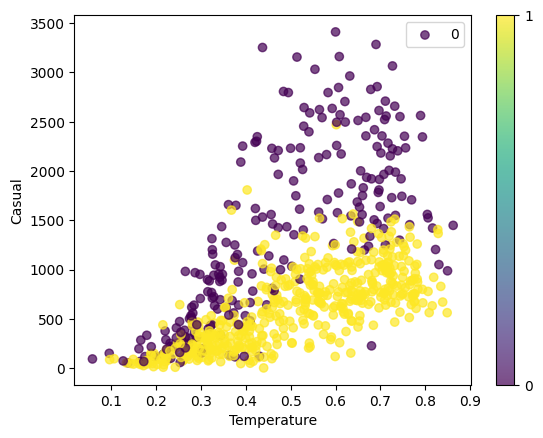

In [33]:
# Plot the distribution of casual users vs temperature
y = daily['casual']
x = daily['temp']
mycolor = daily['workingday']
plt.scatter(x,y,c=mycolor, alpha = 0.7) 
plt.xlabel('Temperature')
plt.ylabel('Casual')
plt.legend(mycolor)
plt.colorbar(ticks = [0,1])

There are more casual users renting bikes when the temperature is warmer.

# Regression

In [34]:
# Define X and y
var = ['temp','windspeed','season', 'weekday', 'workingday', 'weathersit']
X = daily[var]
y = daily['cnt']

In [35]:
# Data splitting for training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
# Train the model and report coefficients
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_,lr.intercept_)

[ 5245.48567189 -1995.73565252   412.66281476    76.77426589
   132.20982981  -800.60943777] 2093.4087280168733


In [37]:
## Get R-squared value for training and test set
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.49817540095276025
0.5285823895780065




The R^2 on the test set is larger
The test set demonstrates a better performance
The test set R^2 is what needs to be reported as the unbiased performance measure.
The test R^2 value is higher than the train. Therefore there is no overfitting. 



In [39]:
## Obtain predicted ys
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [40]:
## Obtain and report MAE
MAE_train = np.mean(abs(y_train-y_pred_train))
MAE_test = np.mean(abs(y_test-y_pred_test))
print(MAE_train,MAE_test)

1161.1887574080558 1152.4435945911387


In [41]:
## Train the polynomial model of degree between 1 to 4
param_poly = {'polynomialfeatures__degree' :  range(1,4)  }

pipe_poly = PolynomialFeatures()
pipe_lr = LinearRegression()
pipe_poly_reg = make_pipeline(pipe_poly,pipe_lr)

grid_poly = GridSearchCV( pipe_poly_reg , param_poly ,cv = 10)

grid_poly.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': range(1, 4)})

In [42]:
## Calculate and report the MSEs
y_pred_train_poly  = grid_poly.predict(X_train)
y_pred_test_poly = grid_poly.predict(X_test)
MSE_train_poly = np.mean((y_train-y_pred_train_poly)**2)
MSE_test_poly = np.mean((y_test-y_pred_test_poly)**2)
print(MSE_train_poly,MSE_test_poly)

1852849.4373569072 1816812.3742340666


In [43]:
## Obtain the test R-squared
grid_poly.score(X_test,y_test)

0.5285823895780064

In [44]:
grid_poly.best_params_

{'polynomialfeatures__degree': 1}

The best polynomial degree is 1

In [45]:
grid_poly.cv_results_

{'mean_fit_time': array([0.00467227, 0.01203241, 0.01940081]),
 'std_fit_time': array([0.00084493, 0.00087545, 0.00123952]),
 'mean_score_time': array([0.00173147, 0.00461099, 0.00523689]),
 'std_score_time': array([0.00010354, 0.00035935, 0.00032516]),
 'param_polynomialfeatures__degree': masked_array(data=[1, 2, 3],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'polynomialfeatures__degree': 1},
  {'polynomialfeatures__degree': 2},
  {'polynomialfeatures__degree': 3}],
 'split0_test_score': array([0.32614579, 0.42297553, 0.44880699]),
 'split1_test_score': array([0.45295325, 0.62418979, 0.63896038]),
 'split2_test_score': array([ 0.49771732, -1.17016879,  0.36351424]),
 'split3_test_score': array([ 0.58621828, -0.08981439,  0.50914895]),
 'split4_test_score': array([ 0.5542634 , -1.09806907, -0.12144124]),
 'split5_test_score': array([ 0.55797455, -0.26148992,  0.58565067]),
 'split6_test_score': array([ 0.17226052, -0.72544

# Model Selection

In [46]:
models = [LinearRegression(),Ridge(),HuberRegressor(),ElasticNetCV(),DecisionTreeRegressor(),RandomForestRegressor(),ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [52]:
def train(model):
    mo = model
    mo.fit(X_train,y_train)
    cv_score = mo.score(X_test,y_test)
    print('Model:',model)
    print('CV score:', cv_score)

In [53]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.5285823895780065
Model: Ridge()
CV score: 0.5225211144667684
Model: HuberRegressor()
CV score: 0.5343021697801502
Model: ElasticNetCV()
CV score: 0.16425207975212952
Model: DecisionTreeRegressor()
CV score: 0.17117322003649604
Model: RandomForestRegressor()
CV score: 0.5064102474211105
Model: ExtraTreesRegressor()
CV score: 0.49056177755059593
Model: GradientBoostingRegressor()
CV score: 0.5799966430627104


In [58]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [59]:
y_pred_train_ridge = gbr.predict(X_train)
y_pred_test_ridge = gbr.predict(X_test)

In [60]:
gbr.score(X_test,y_test)

0.5804350850386408